In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping

In [300]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [301]:
X_train = np.stack(train['feat_vector'].apply(eval))
X_test = np.stack(test['feat_vector'].apply(eval))
y_train = np.array(pd.get_dummies((train['target']).values))
y_test = np.array(pd.get_dummies((test['target']).values))

In [302]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 20)
(4000, 20)
(16000, 2)
(4000, 2)


In [303]:
model = Sequential([
    Embedding(3000, 128, input_length=X_train.shape[1]),
    SpatialDropout1D(.2),
    LSTM(256, dropout=.9, recurrent_dropout=.9),
    Dense(2, activation='sigmoid')
])

In [304]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [305]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 20, 128)           384000    
                                                                 
 spatial_dropout1d_19 (Spati  (None, 20, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_19 (LSTM)              (None, 256)               394240    
                                                                 
 dense_19 (Dense)            (None, 2)                 514       
                                                                 
Total params: 778,754
Trainable params: 778,754
Non-trainable params: 0
_________________________________________________________________


In [306]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=.2,
    shuffle=False,
    callbacks=[early_stop]
)

Epoch 1/10
400/400 [==============================] - 54s 130ms/step - loss: 0.6613 - accuracy: 0.5883 - val_loss: 0.5848 - val_accuracy: 0.7006
Epoch 2/10
400/400 [==============================] - 49s 123ms/step - loss: 0.5909 - accuracy: 0.6784 - val_loss: 0.5606 - val_accuracy: 0.7113
Epoch 3/10
400/400 [==============================] - 50s 124ms/step - loss: 0.5531 - accuracy: 0.7177 - val_loss: 0.5451 - val_accuracy: 0.7241
Epoch 4/10
400/400 [==============================] - 48s 121ms/step - loss: 0.5313 - accuracy: 0.7301 - val_loss: 0.5425 - val_accuracy: 0.7219
Epoch 5/10
400/400 [==============================] - 48s 121ms/step - loss: 0.5147 - accuracy: 0.7409 - val_loss: 0.5446 - val_accuracy: 0.7241
Epoch 6/10
400/400 [==============================] - 48s 121ms/step - loss: 0.4977 - accuracy: 0.7571 - val_loss: 0.5515 - val_accuracy: 0.7256
Epoch 7/10
400/400 [==============================] - 49s 121ms/step - loss: 0.4854 - accuracy: 0.7625 - val_loss: 0.5568 - val_ac

In [307]:
model.save('../model/model_latest.h5')

In [308]:
df_hist = pd.DataFrame(history.history)

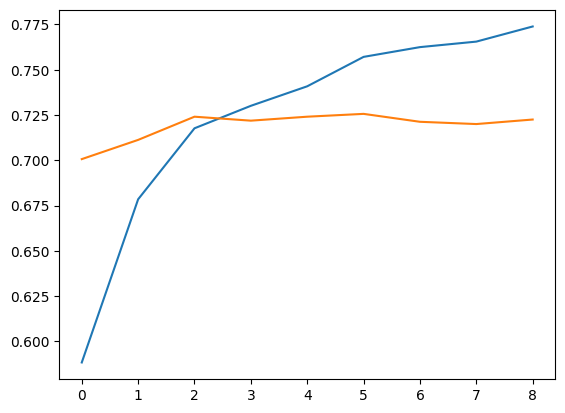

In [309]:
df_hist['accuracy'].plot();
df_hist['val_accuracy'].plot();

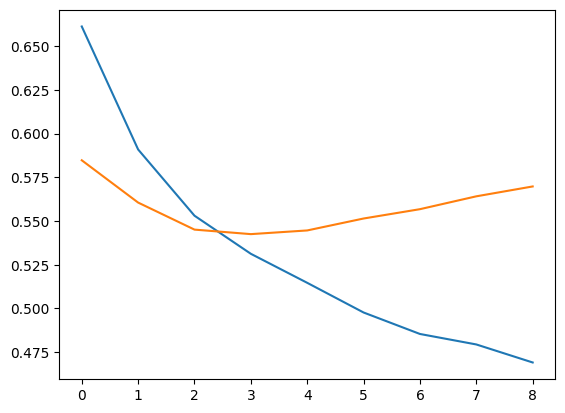

In [310]:
df_hist['loss'].plot();
df_hist['val_loss'].plot();

In [311]:
model.evaluate(X_test, y_test)

125/125 [==============================] - 5s 43ms/step - loss: 0.5755 - accuracy: 0.7170


[0.5755250453948975, 0.7170000076293945]

In [312]:
y_pred = model.predict(X_test)

125/125 [==============================] - 5s 40ms/step


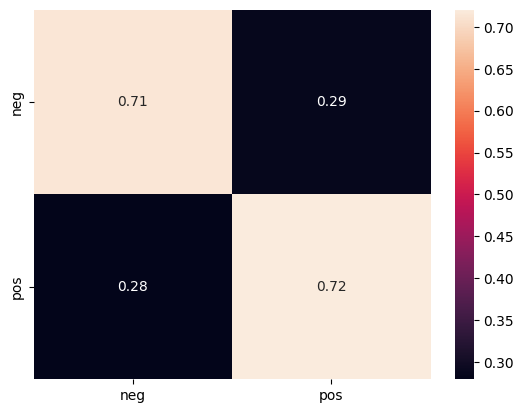

In [313]:
predictions = []

for i in range(len(y_pred)):
    predictions.append(np.argmax(y_pred[i]))

c_mat = confusion_matrix(test['target'].values, predictions, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos']);